In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

%matplotlib inline

In [133]:
df = pd.read_csv(r"amz_uk_price_prediction_dataset.csv")

Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories and their best-seller status.

Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.

Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

In [134]:
# The below table shows the categories in which best selling products are most prevalent.
bestsellerdf = pd.crosstab(df["category"], df["isBestSeller"])
bestsellerdf["bestpercentage"] = (bestsellerdf[True]/(bestsellerdf[False] + bestsellerdf[True]))*100
bestsellerdf.drop(columns=[False,True]).sort_values(by=["bestpercentage"], ascending=False)

isBestSeller,bestpercentage
category,
Grocery,5.813467
Smart Home Security & Lighting,5.769231
Health & Personal Care,5.768628
Mobile Phone Accessories,4.247104
Power & Hand Tools,3.533895
...,...
"CD, Disc & Tape Players",0.000000
General Music-Making Accessories,0.000000
Snowboard Boots,0.000000


Statistical Tests:

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
Compute Cramér's V to understand the strength of association between best-seller status and category.

In [135]:
bestsellerdf = pd.crosstab(df["category"], df["isBestSeller"])

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(bestsellerdf)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [136]:
association(bestsellerdf, method="cramer")


0.1222829439760564

In [137]:
# Through both tests we can gather that best seller distribution and category are dependent but not strongly on eachother.

Visualizations:

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

<Axes: xlabel='category'>

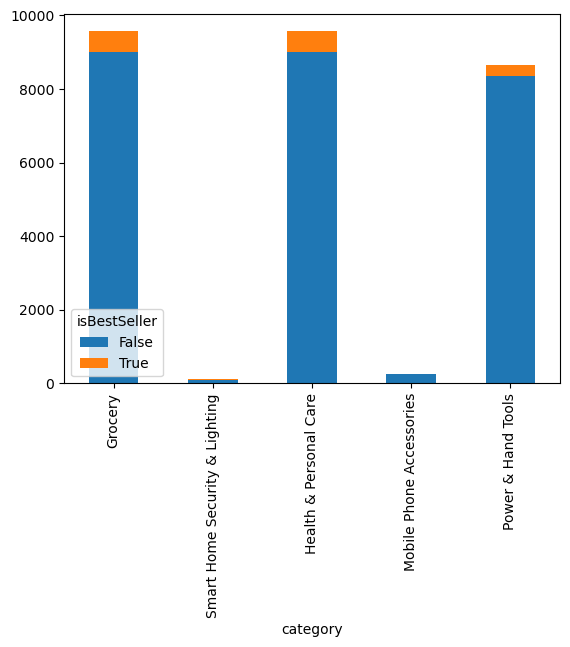

In [138]:
bestsellerdf = pd.crosstab(df["category"], df["isBestSeller"])
bestsellerdf["bestpercentage"] = (bestsellerdf[True]/(bestsellerdf[False] + bestsellerdf[True]))*100
bestsellerdf.sort_values(by=["bestpercentage"], ascending=False,inplace=True)
bestsellerdf
bestsellerdf.drop(columns="bestpercentage").head(5).plot(kind="bar", stacked=True)

Part 2: Exploring Product Prices and Ratings Across Categories and Brands
Objective: Investigate how different product categories influence product prices.

Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

In [199]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [200]:
dftest = df.copy()

In [201]:
data_series = dftest['price']  # replace 'ColumnName' with your specific column
outliers = tukeys_test_outliers(data_series)
dftest = dftest[~dftest["price"].isin(outliers)]

In [207]:
dftest

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.



<Axes: xlabel='category', ylabel='price'>

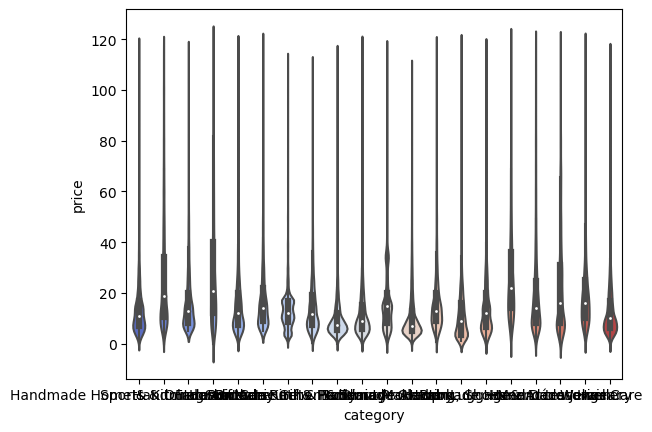

In [216]:
top_category_count = dftest["category"].value_counts().head(20).index
sns.violinplot(data=dftest[dftest["category"].isin(top_category_count)], x='category', y='price', palette="coolwarm")

Which product category tends to have the highest median price? Don't filter here by top categories.

In [222]:
dftest.groupby(["category"]).agg( median =("price", "median")).sort_values("median", ascending=False)

,median
category,
Desktop PCs,78.99
Skiing Poles,78.06
Motherboards,76.49
Tablets,75.05
Graphics Cards,69.99
...,...
Adapters,7.05
Make-up,7.00
Signs & Plaques,6.99


Bar Charts:

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).


In [239]:
sns.set_theme(rc={'figure.figsize':(6,6)})

[Text(0, 0, 'Sports & Outdoors'),
 Text(1, 0, 'Handmade Gifts'),
 Text(2, 0, 'Skin Care'),
 Text(3, 0, 'Birthday Gifts'),
 Text(4, 0, 'Bath & Body'),
 Text(5, 0, 'Manicure & Pedicure Products'),
 Text(6, 0, 'Beauty'),
 Text(7, 0, 'Make-up'),
 Text(8, 0, 'Handmade Clothing, Shoes & Accessories'),
 Text(9, 0, 'Hair Care')]

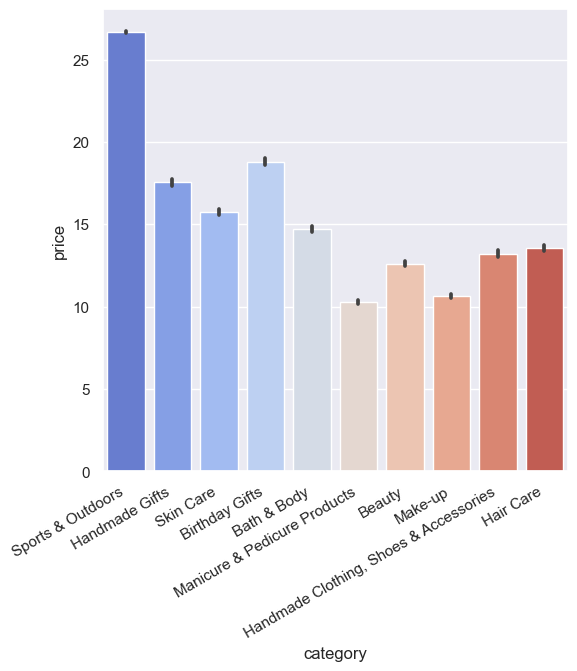

In [240]:
top_category_count = dftest["category"].value_counts().head(10).index
barplot = sns.barplot(data=dftest[dftest["category"].isin(top_category_count)], x='category', y='price', palette="coolwarm")
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=30, horizontalalignment='right')


In [ ]:
timediff.astype('int64').astype(float)

,client_id,date_time,time_diff
count,4.498310e+05,449831,449830
mean,5.002870e+06,2017-04-20 03:14:29.206959360,0 days 00:00:18.822317319
min,1.690000e+02,2017-03-15 00:03:03,0 days 00:00:00
25%,2.515550e+06,2017-04-04 16:29:48,0 days 00:00:01
50%,5.025522e+06,2017-04-12 14:17:37,0 days 00:00:04
75%,7.468377e+06,2017-04-30 22:28:35.500000,0 days 00:00:12
max,9.999839e+06,2017-06-20 23:57:06,0 days 07:07:10
std,2.873031e+06,NaN,0 days 00:02:33.417518029


Which product category commands the highest average price? Don't filter here by top categorie

In [245]:
dftest.groupby(["category"]).agg( average =("price", "mean")).sort_values("average", ascending=False)

,average
category,
Motherboards,77.098280
Tablets,74.200067
Desktop PCs,73.612587
Graphics Cards,71.898507
Skiing Poles,68.989887
...,...
Bedding Accessories,8.835220
Adapters,8.750197
Signs & Plaques,8.229790


Box Plots:

Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.


[Text(0, 0, 'Sports & Outdoors'),
 Text(1, 0, 'Handmade Gifts'),
 Text(2, 0, 'Skin Care'),
 Text(3, 0, 'Birthday Gifts'),
 Text(4, 0, 'Bath & Body'),
 Text(5, 0, 'Manicure & Pedicure Products'),
 Text(6, 0, 'Beauty'),
 Text(7, 0, 'Make-up'),
 Text(8, 0, 'Handmade Clothing, Shoes & Accessories'),
 Text(9, 0, 'Hair Care')]

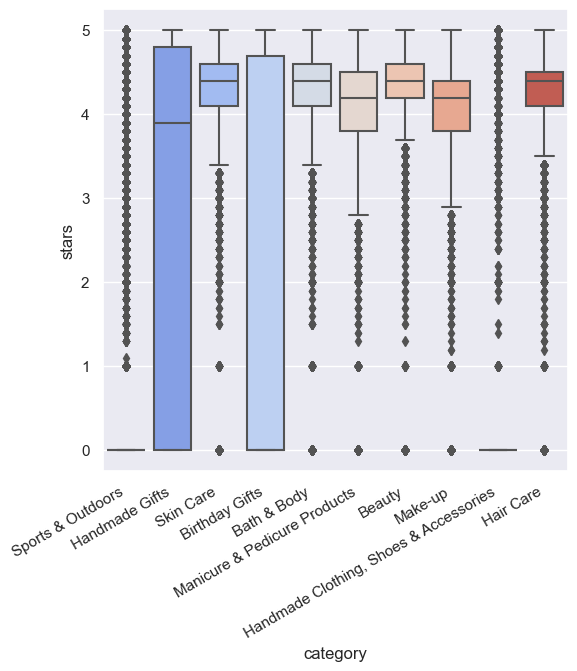

In [252]:
top_category_count = dftest["category"].value_counts().head(10).index
boxplot = sns.boxplot(data=dftest[dftest["category"].isin(top_category_count)], x='category', y='stars', palette="coolwarm")
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=30, horizontalalignment='right')


Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [256]:
dftest.groupby(["category"]).agg(median =("stars", "median")).sort_values("median", ascending=False)

,median
category,
Computer Memory,4.7
Kids' Play Figures,4.6
Office Paper Products,4.6
Luxury Food & Drink,4.6
Hobbies,4.6
...,...
Hockey Shoes,0.0
Hi-Fi Receivers & Separates,0.0
Handmade Kitchen & Dining,0.0


Part 3: Investigating the Interplay Between Product Prices and Ratings

Objective: Analyze how product ratings (stars) correlate with product prices.

Correlation Coefficients:

Calculate the correlation coefficient between price and stars.

Is there a significant correlation between product price and its rating?

In [286]:
df_numerical = dftest.select_dtypes("number").drop(columns="boughtInLastMonth")
df_numerical = df_numerical.drop(columns="uid")

In [287]:
spearman_correlations = df_numerical.corrwith(dftest["price"], method='spearman')
spearman_correlations

stars     -0.070476
reviews   -0.082492
price      1.000000
dtype: float64

In [288]:
pearson_correlations = df_numerical.corrwith(dftest["price"], method='pearson')
pearson_correlations

stars     -0.081723
reviews   -0.008594
price      1.000000
dtype: float64

In [ ]:
# Coefficients suggest little to no correlation between price and stars.

Visualizations:

Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?



<Axes: xlabel='stars', ylabel='price'>

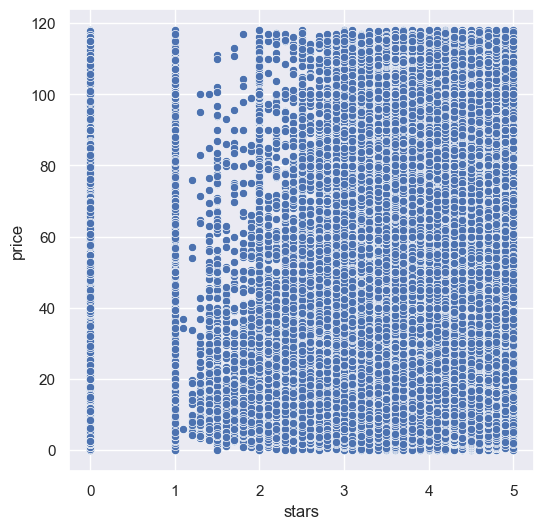

In [293]:
sns.scatterplot(data=dftest, x='stars', y='price')

Use a correlation heatmap to visualize correlations between all numerical variables.

Examine if product prices typically follow a normal distribution using a QQ plot.


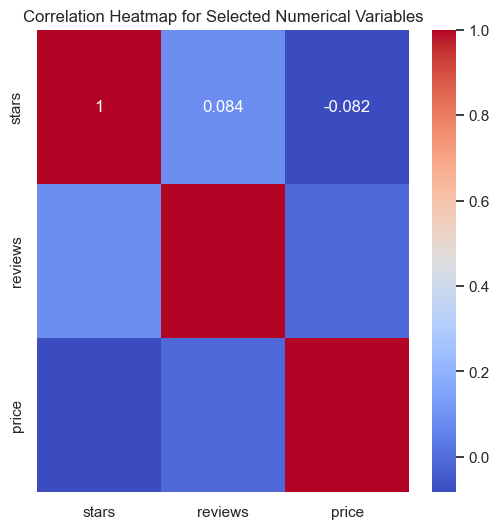

In [302]:
correlation_matrix = df_numerical.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

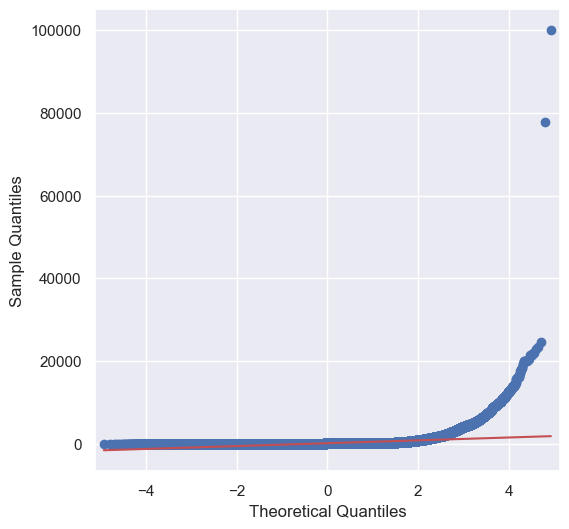

In [305]:
import statsmodels.api as sm
sm.qqplot(df['price'], line='s')